In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

def get_x_y_from_pandas(df, features_str, algo):
    X, Y = [], []
    xs = [[] for _ in range(len(features_str))]
    
    for i, f in enumerate(features_str):
        xs[i] = df[[f]].to_numpy().flatten()
    ys = df[[algo]].to_numpy().flatten()
    
    for i in range(len(xs[0])):
        X.append([x[i] for x in xs])
        Y.append(ys[i])
    return np.array(X), np.array(Y)

# DS = "ml-100k"
DS = "ml-1M"

MODEL_NAMES = ["UserKNN-Amplified", "UserKNN-BM25", "UserKNN-Cosine", "UserKNN-IDF",
               "ItemKNN-AdjustedCosine", "BPR", "MF", "SVD", "PMF", "NMF"]

METRICS = ["MAE", "RMSE", "AUC", "MAP", "NDCG@100", "Precision@100", "Recall@100"]

FEATURES = ["gini", "variation", "num_ratings", "rating_avg",
           "rating_std", "phi", "avg_phi", "entropy", "entropy_of_consumed_sum",
           "entropy_of_consumed_avg", "proportion_long_tailors"]

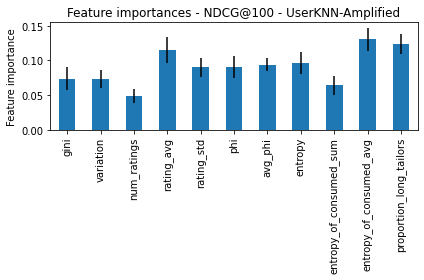

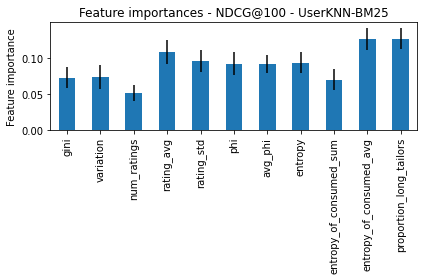

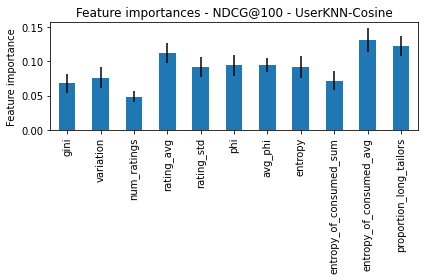

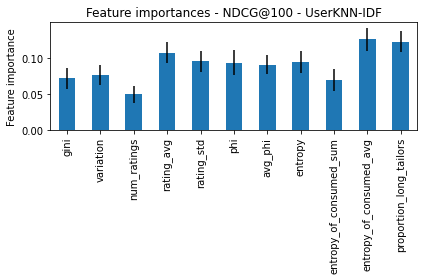

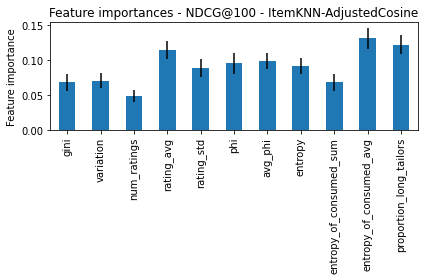

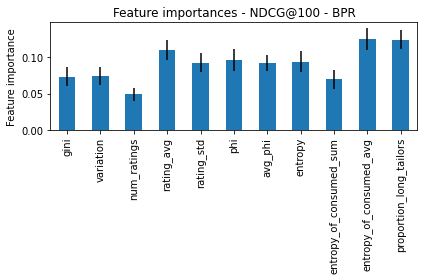

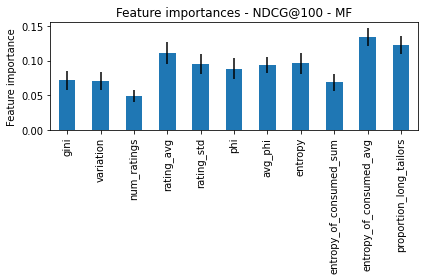

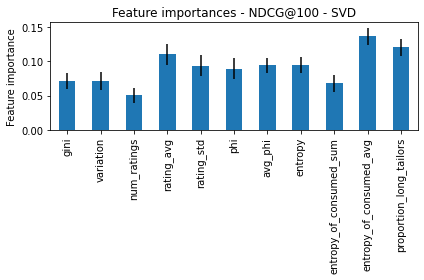

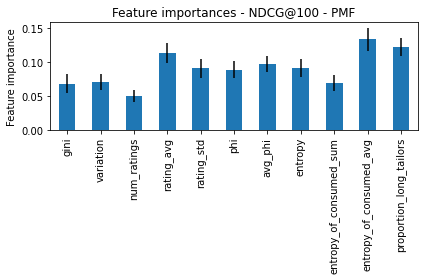

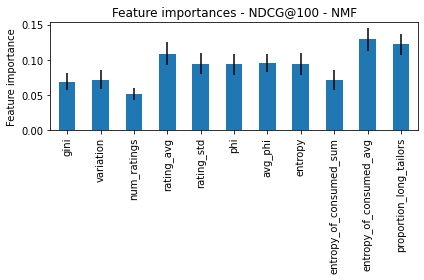

In [2]:
metric = "NDCG@100"
# algo = "NMF"

# for algo in MODEL_NAMES:
for algo in MODEL_NAMES:
    df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                              sep='\s*,\s*', index_col=0, engine='python')
    df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                            sep='\s*,\s*', index_col=0, engine='python')
    df = df_features.join(df_models)

    x, y = get_x_y_from_pandas(df, FEATURES, algo)
    forest = RandomForestRegressor()
    forest.fit(x,y)
    importances = forest.feature_importances_
    std = np.std([
        tree.feature_importances_ for tree in forest.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=FEATURES)
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title(f"Feature importances - {metric} - {algo}")
    ax.set_ylabel("Feature importance")
    fig.tight_layout()

KeyboardInterrupt: 

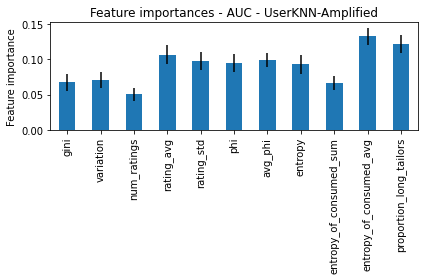

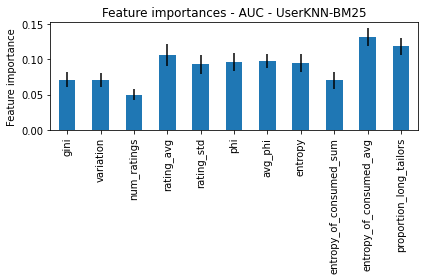

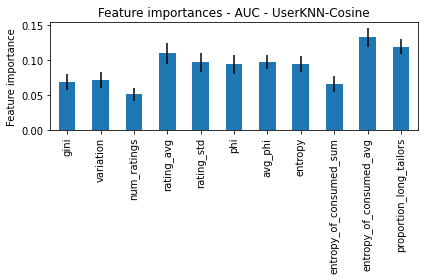

In [3]:
metric = "AUC"

# for algo in MODEL_NAMES:
for algo in MODEL_NAMES:
    df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                              sep='\s*,\s*', index_col=0, engine='python')
    df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                            sep='\s*,\s*', index_col=0, engine='python')
    df = df_features.join(df_models)

    x, y = get_x_y_from_pandas(df, FEATURES, algo)
    forest = RandomForestRegressor()
    forest.fit(x,y)
    importances = forest.feature_importances_
    std = np.std([
        tree.feature_importances_ for tree in forest.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=FEATURES)
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title(f"Feature importances - {metric} - {algo}")
    ax.set_ylabel("Feature importance")
    fig.tight_layout()

In [ ]:
from sklearn.model_selection import train_test_split

def divide_Y_into_groups(Y, num_groups):
    max_y, min_y = max(Y), min(Y)
    bucket_size = (max_y-min_y)/num_groups
    y_buckets = [[] for _ in range(num_groups+1)]
    res = []
    for i in Y:
        idx = int((i-min_y)//bucket_size)
        y_buckets[idx].append(i)
        res.append(idx)
    return res, y_buckets

metric = "NDCG@100"
# algo = "NMF"

# for algo in MODEL_NAMES:
for algo in MODEL_NAMES:
    df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                              sep='\s*,\s*', index_col=0, engine='python')
    df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                            sep='\s*,\s*', index_col=0, engine='python')
    df = df_features.join(df_models)

    x, y = get_x_y_from_pandas(df, FEATURES, algo)
    y, y_buckets = divide_Y_into_groups(y, 5)
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=123)  
    forest = RandomForestClassifier()
    forest.fit(X_train, y_train)
    mean_acc = forest.score(X_test, y_test)
    
    # print metrics
    print(f'{metric}@{algo} -> buckets size:{[len(a) for a in y_buckets]}')
    print(f'{metric}@{algo} -> forest_mean_acc: {round(mean_acc, 3)}')
    print()
    
    # plot importances
    importances = forest.feature_importances_
    std = np.std([
        tree.feature_importances_ for tree in forest.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=FEATURES)
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title(f"Feature importances - {metric} - {algo}")
    ax.set_ylabel("Feature importance")
    fig.tight_layout()

In [ ]:
metric = "NDCG@100"
# algo = "NMF"

# for algo in MODEL_NAMES:
for algo in MODEL_NAMES:
    df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                              sep='\s*,\s*', index_col=0, engine='python')
    df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                            sep='\s*,\s*', index_col=0, engine='python')
    df = df_features.join(df_models)

    x, y = get_x_y_from_pandas(df, FEATURES, algo)
    y, y_buckets = divide_Y_into_groups(y, 5)
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=123)  
    forest = RandomForestClassifier()
    forest.fit(X_train, y_train)
    mean_acc = forest.score(X_test, y_test)
    
    # print metrics
    print(f'{metric}@{algo} -> buckets size:{[len(a) for a in y_buckets]}')
    print(f'{metric}@{algo} -> forest_mean_acc: {round(mean_acc, 3)}')
    print()

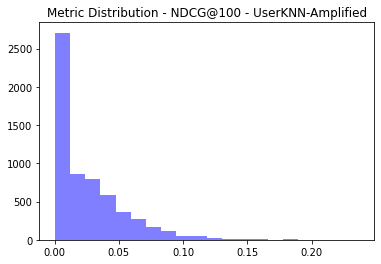

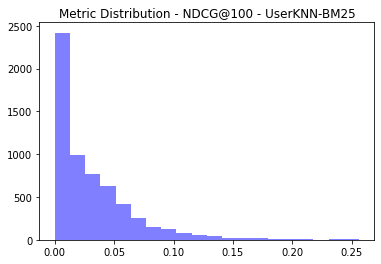

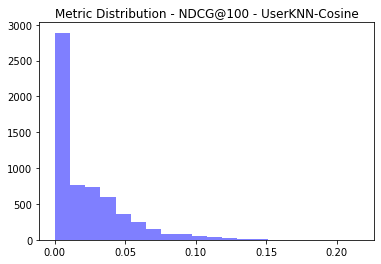

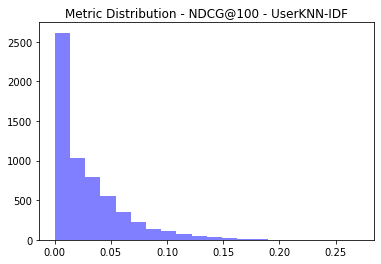

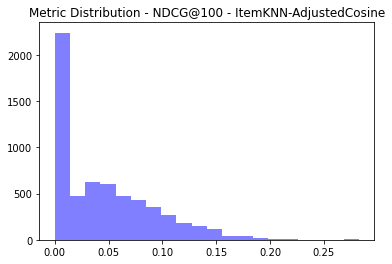

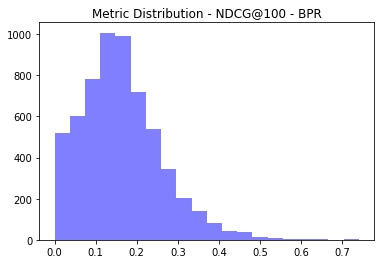

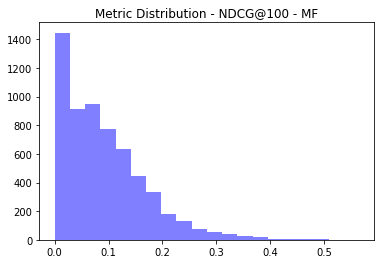

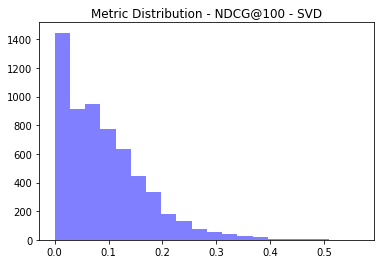

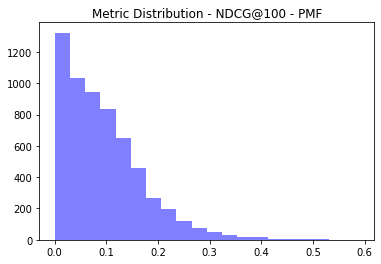

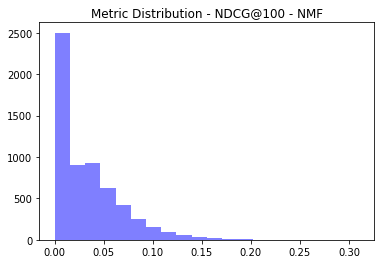

In [7]:
metric = "NDCG@100"
# algo = "NMF"

# for algo in MODEL_NAMES:
for algo in MODEL_NAMES:
    df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                              sep='\s*,\s*', index_col=0, engine='python')
    df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                            sep='\s*,\s*', index_col=0, engine='python')
    df = df_features.join(df_models)

    _, y = get_x_y_from_pandas(df, FEATURES, algo)

    num_bins = 20
    n, bins, patches = plt.hist(y, num_bins, facecolor='blue', alpha=0.5)
    plt.title(f"Metric Distribution - {metric} - {algo}")
    plt.show()

In [22]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

def divide_Y_into_groups(Y, cuts=[0.1, 0.25]):
    res = []
    y_buckets = [[] for _ in range(len(cuts)+1)]
    for y in Y:
        idx = len(cuts)
        for i, c in enumerate(cuts):
            if(y <= c):
                idx = min(i, idx)
                break
        res.append(idx)
        y_buckets[idx].append(c)
    return res, y_buckets

metric = "NDCG@100"
algos = [('BPR', [0.1, 0.2]), ('PMF', [0.06, 0.15]), ('MF', [0.05, 0.11])]

for (algo, cuts) in algos:
    df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                              sep='\s*,\s*', index_col=0, engine='python')
    df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                            sep='\s*,\s*', index_col=0, engine='python')
    df = df_features.join(df_models)

    x, y = get_x_y_from_pandas(df, FEATURES, algo)
    y, y_buckets = divide_Y_into_groups(y, cuts)
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=123)  
    forest = RandomForestClassifier()
    forest.fit(X_train, y_train)
    mean_acc = forest.score(X_test, y_test)
    y_pred = forest.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    # print metrics
    print(f'{metric}@{algo} -> cuts:{cuts}')
    print(f'{metric}@{algo} -> buckets size:{[len(a) for a in y_buckets]}')
    print(f'{metric}@{algo} -> forest_mean_acc: {round(mean_acc, 3)}')
    print(f'{metric}@{algo} -> confusion matrix [actual (linhas) vs predicted (colunas)]:')
    print(cm)
    print()

NDCG@100@BPR -> cuts:[0.1, 0.2]
NDCG@100@BPR -> buckets size:[1658, 2555, 1827]
NDCG@100@BPR -> forest_mean_acc: 0.358
NDCG@100@BPR -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[ 75 271  67]
 [ 90 385 136]
 [ 85 321  80]]

NDCG@100@PMF -> cuts:[0.06, 0.15]
NDCG@100@PMF -> buckets size:[2398, 2430, 1212]
NDCG@100@PMF -> forest_mean_acc: 0.386
NDCG@100@PMF -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[305 270  21]
 [307 268  28]
 [159 142  10]]

NDCG@100@MF -> cuts:[0.05, 0.11]
NDCG@100@MF -> buckets size:[2149, 1855, 2036]
NDCG@100@MF -> forest_mean_acc: 0.326
NDCG@100@MF -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[237 117 163]
 [216 113 146]
 [230 146 142]]



In [23]:
from sklearn.model_selection import train_test_split

def divide_Y_into_groups(Y, num_groups):
    max_y, min_y = max(Y), min(Y)
    bucket_size = (max_y-min_y)/num_groups
    y_buckets = [[] for _ in range(num_groups+1)]
    res = []
    for i in Y:
        idx = int((i-min_y)//bucket_size)
        y_buckets[idx].append(i)
        res.append(idx)
    return res, y_buckets

metric = "NDCG@100"
algos = [('BPR', [0.1, 0.2]), ('PMF', [0.06, 0.15]), ('MF', [0.05, 0.11])]

for algo, _ in algos:
    df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                              sep='\s*,\s*', index_col=0, engine='python')
    df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                            sep='\s*,\s*', index_col=0, engine='python')
    df = df_features.join(df_models)

    x, y = get_x_y_from_pandas(df, FEATURES, algo)
    y, y_buckets = divide_Y_into_groups(y, 3)
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=123)  
    forest = RandomForestClassifier()
    forest.fit(X_train, y_train)
    mean_acc = forest.score(X_test, y_test)
    y_pred = forest.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    # print metrics
    print(f'{metric}@{algo} -> cuts:{cuts}')
    print(f'{metric}@{algo} -> buckets size:{[len(a) for a in y_buckets]}')
    print(f'{metric}@{algo} -> forest_mean_acc: {round(mean_acc, 3)}')
    print(f'{metric}@{algo} -> confusion matrix [actual (linhas) vs predicted (colunas)]:')
    print(cm)
    print()

NDCG@100@BPR -> cuts:[0.05, 0.11]
NDCG@100@BPR -> buckets size:[5009, 998, 32, 1]
NDCG@100@BPR -> forest_mean_acc: 0.818
NDCG@100@BPR -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[1235    1    0]
 [ 266    0    0]
 [   8    0    0]]

NDCG@100@PMF -> cuts:[0.05, 0.11]
NDCG@100@PMF -> buckets size:[5427, 585, 28, 0]
NDCG@100@PMF -> forest_mean_acc: 0.901
NDCG@100@PMF -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[1359    1    0]
 [ 144    1    0]
 [   5    0    0]]

NDCG@100@MF -> cuts:[0.05, 0.11]
NDCG@100@MF -> buckets size:[5398, 607, 34, 1]
NDCG@100@MF -> forest_mean_acc: 0.89
NDCG@100@MF -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[1344    4    0]
 [ 157    0    0]
 [   5    0    0]]



# Estudo das Features:
+ Métricas normalizadas
+ Plotar distribuição (antes e depois de normalizar)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

DS = 'ml-1M'
METRICS = ["gini", "variation", "num_ratings", "rating_avg",
           "rating_std", "phi", "avg_phi", "entropy", "entropy_of_consumed_sum",
           "entropy_of_consumed_avg", "proportion_long_tailors"]

def get_features_from_pandas(df, features_str, algo):
    X, Y = [], []
    xs = [[] for _ in range(len(features_str))]
    
    for i, f in enumerate(features_str):
        xs[i] = df[[f]].to_numpy().flatten()
    ys = df[[algo]].to_numpy().flatten()
    
    for i in range(len(xs[0])):
        X.append([x[i] for x in xs])
        Y.append(ys[i])
    return np.array(X), np.array(Y)

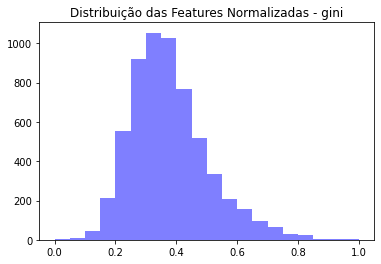

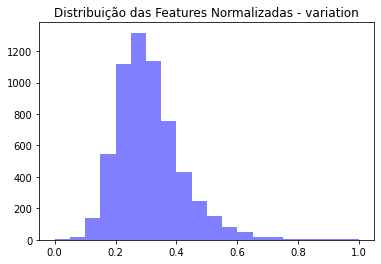

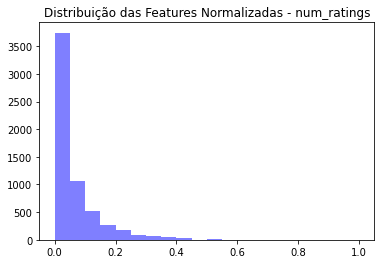

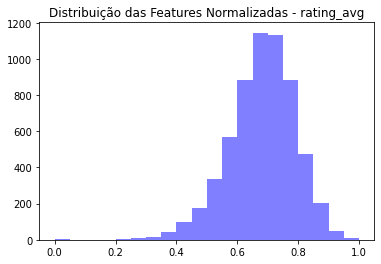

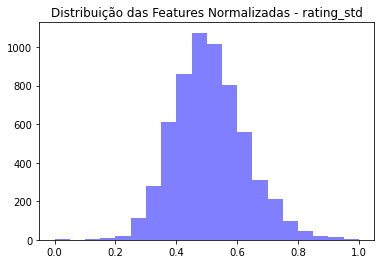

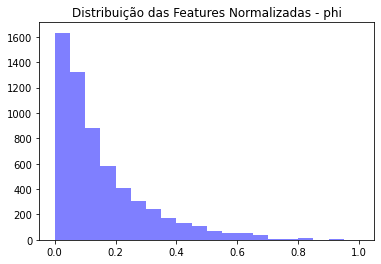

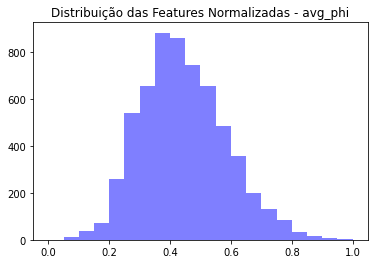

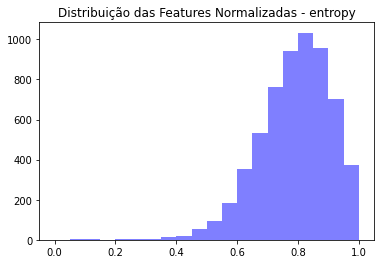

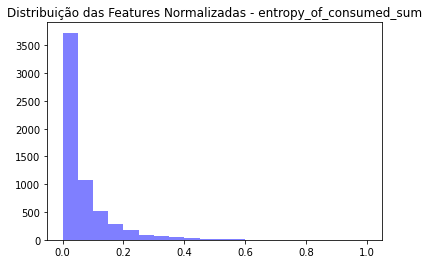

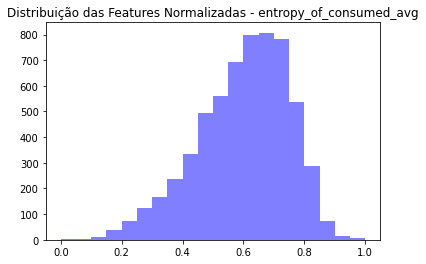

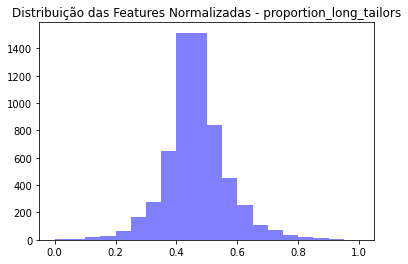

In [9]:
for f in METRICS:
    df_features = pd.read_csv(f"../datasets/{DS}/normalized_user_metrics.csv",
                              sep='\s*,\s*', index_col=0, engine='python')

    feat_arr = df_features[[f]].to_numpy().flatten()

    num_bins = 20
    n, bins, patches = plt.hist(feat_arr, num_bins, facecolor='blue', alpha=0.5)
    plt.title(f"Distribuição das Features Normalizadas - {f}")
    plt.show()

In [20]:
# for f in METRICS:
#     df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
#                               sep='\s*,\s*', index_col=0, engine='python')

#     feat_arr = df_features[[f]].to_numpy().flatten()

#     num_bins = 20
#     n, bins, patches = plt.hist(feat_arr, num_bins, facecolor='blue', alpha=0.5)
#     plt.title(f"Distribuição das Features NÃO Normalizadas - {f}")
#     plt.show()

+ Dividir as Features em Buckets

In [4]:
def get_new_x_y_from_pandas(df, features_str, features_in_buckets, algo):
    X, Y = [], []
    xs = [[] for _ in range(len(features_str))]
    
    for i, f in enumerate(features_str):
        xs[i] = df[[f]].to_numpy().flatten()
    ys = df[[algo]].to_numpy().flatten()
    
    for i in range(len(xs[0])):
        X.append([x[i] for x in xs] + [b[i] for b in features_in_buckets])
        Y.append(ys[i])
    return np.array(X), np.array(Y)

def divide_into_groups(arr, cuts=[0.1, 0.25]):
    res = []
    y_buckets = [[] for _ in range(len(cuts)+1)]
    for y in arr:
        idx = len(cuts)
        for i, c in enumerate(cuts):
            if(y <= c):
                idx = min(i, idx)
                break
        res.append(idx)
        y_buckets[idx].append(c)
    return res, y_buckets

def divide_Y_into_groups(Y, cuts=[0.1, 0.25]):
    res = []
    y_buckets = [[] for _ in range(len(cuts)+1)]
    for y in Y:
        idx = len(cuts)
        for i, c in enumerate(cuts):
            if(y <= c):
                idx = min(i, idx)
                break
        res.append(idx)
        y_buckets[idx].append(c)
    return res, y_buckets
    

In [8]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, f1_score

FEATURES = ["gini", "variation", "num_ratings", "rating_avg",
           "rating_std", "phi", "avg_phi", "entropy", "entropy_of_consumed_sum",
           "entropy_of_consumed_avg", "proportion_long_tailors"]
FEATURES_C = [("gini", [0.2, 0.5, 0.7]), ("variation", [0.2, 0.4, 0.55]), ("num_ratings", [0.1, 0.25]),
            ("rating_avg", [0.4, 0.6, 0.8]), ("rating_std", [0.4, 0.6]), ("phi", [0.15, 0.3, 0.6]),
            ("avg_phi", [0.3, 0.6]), ("entropy", [0.4, 0.7]), ("entropy_of_consumed_sum", [0.1, 0.3]),
            ("entropy_of_consumed_avg", [0.5, 0.7]), ("proportion_long_tailors", [0.3, 0.6, 0.8])]

metric = "NDCG@100"

algos = ['BPR', 'PMF', 'MF']
algos_cuts = [('BPR', [0.1, 0.2]), ('PMF', [0.06, 0.15]), ('MF', [0.05, 0.11])]

DS = 'ml-1M'

df_norm_features = pd.read_csv(f"../datasets/{DS}/normalized_user_metrics.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                        sep='\s*,\s*', index_col=0, engine='python')
df = df_norm_features.join(df_models)

# GEt new bucket features
features_in_buckets = []
for (f, cuts) in FEATURES_C:
    feat_arr = df_norm_features[[f]].to_numpy().flatten()
    x, bk = divide_into_groups(feat_arr, cuts)
    features_in_buckets.append(x)

for (algo, c) in algos_cuts:
    X, y = get_new_x_y_from_pandas(df, FEATURES, features_in_buckets, algo)
    y, y_buckets = divide_Y_into_groups(y, c)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)  
    forest = RandomForestClassifier()
    forest.fit(X_train, y_train)
    mean_acc = forest.score(X_test, y_test)
    y_pred = forest.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # print metrics
    print(f'{metric}@{algo} -> cuts:{c}')
    print(f'{metric}@{algo} -> buckets size:{[len(a) for a in y_buckets]}')
    print(f'{metric}@{algo} -> forest_mean_acc: {round(mean_acc, 3)}')
    print(f'{metric}@{algo} -> f1_score: {round(f1, 3)}')
    print(f'{metric}@{algo} -> confusion matrix [actual (linhas) vs predicted (colunas)]:')
    print(cm)
    print()
    

NDCG@100@BPR -> cuts:[0.1, 0.2]
NDCG@100@BPR -> buckets size:[1658, 2555, 1827]
NDCG@100@BPR -> forest_mean_acc: 0.352
NDCG@100@BPR -> f1_score: 0.294
NDCG@100@BPR -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[ 64 281  68]
 [100 391 120]
 [ 88 322  76]]

NDCG@100@PMF -> cuts:[0.06, 0.15]
NDCG@100@PMF -> buckets size:[2398, 2430, 1212]
NDCG@100@PMF -> forest_mean_acc: 0.381
NDCG@100@PMF -> f1_score: 0.301
NDCG@100@PMF -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[292 284  20]
 [301 274  28]
 [156 146   9]]

NDCG@100@MF -> cuts:[0.05, 0.11]
NDCG@100@MF -> buckets size:[2149, 1855, 2036]
NDCG@100@MF -> forest_mean_acc: 0.338
NDCG@100@MF -> f1_score: 0.33
NDCG@100@MF -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[241 115 161]
 [225 112 138]
 [224 136 158]]



In [7]:
import pandas as pd
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, f1_score

FEATURES = ["gini", "variation", "num_ratings", "rating_avg",
           "rating_std", "phi", "avg_phi", "entropy", "entropy_of_consumed_sum",
           "entropy_of_consumed_avg", "proportion_long_tailors"]
FEATURES_C = [("gini", [0.2, 0.5, 0.7]), ("variation", [0.2, 0.4, 0.55]), ("num_ratings", [0.1, 0.25]),
            ("rating_avg", [0.4, 0.6, 0.8]), ("rating_std", [0.4, 0.6]), ("phi", [0.15, 0.3, 0.6]),
            ("avg_phi", [0.3, 0.6]), ("entropy", [0.4, 0.7]), ("entropy_of_consumed_sum", [0.1, 0.3]),
            ("entropy_of_consumed_avg", [0.5, 0.7]), ("proportion_long_tailors", [0.3, 0.6, 0.8])]

metric = "NDCG@100"

algos = ['BPR', 'PMF', 'MF']
algos_cuts = [('BPR', [0.1, 0.2]), ('PMF', [0.06, 0.15]), ('MF', [0.05, 0.11])]

DS = 'ml-1M'

df_norm_features = pd.read_csv(f"../datasets/{DS}/normalized_user_metrics.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                        sep='\s*,\s*', index_col=0, engine='python')
df = df_features.join(df_models)

# GEt new bucket features
features_in_buckets = []
for (f, cuts) in FEATURES_C:
    feat_arr = df_norm_features[[f]].to_numpy().flatten()
    x, bk = divide_into_groups(feat_arr, cuts)
    features_in_buckets.append(x)

for (algo, c) in algos_cuts:
    X, y = get_new_x_y_from_pandas(df, FEATURES, features_in_buckets, algo)
    y, y_buckets = divide_Y_into_groups(y, c)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)  
    forest = RandomForestClassifier()
    forest.fit(X_train, y_train)
    mean_acc = forest.score(X_test, y_test)
    y_pred = forest.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # print metrics
    print(f'{metric}@{algo} -> cuts:{c}')
    print(f'{metric}@{algo} -> buckets size:{[len(a) for a in y_buckets]}')
    print(f'{metric}@{algo} -> forest_mean_acc: {round(mean_acc, 3)}')
    print(f'{metric}@{algo} -> f1_score: {round(f1, 3)}')
    print(f'{metric}@{algo} -> confusion matrix [actual (linhas) vs predicted (colunas)]:')
    print(cm)
    print()

NDCG@100@BPR -> cuts:[0.1, 0.2]
NDCG@100@BPR -> buckets size:[1658, 2555, 1827]
NDCG@100@BPR -> forest_mean_acc: 0.351
NDCG@100@BPR -> f1_score: 0.291
NDCG@100@BPR -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[ 59 275  79]
 [ 93 394 124]
 [ 81 328  77]]

NDCG@100@PMF -> cuts:[0.06, 0.15]
NDCG@100@PMF -> buckets size:[2398, 2430, 1212]
NDCG@100@PMF -> forest_mean_acc: 0.386
NDCG@100@PMF -> f1_score: 0.303
NDCG@100@PMF -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[307 264  25]
 [309 268  26]
 [160 143   8]]

NDCG@100@MF -> cuts:[0.05, 0.11]
NDCG@100@MF -> buckets size:[2149, 1855, 2036]
NDCG@100@MF -> forest_mean_acc: 0.334
NDCG@100@MF -> f1_score: 0.326
NDCG@100@MF -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[240 121 156]
 [215 110 150]
 [218 146 154]]



# Estudo da Relação Linear entre as Features e o NDCG@100

In [6]:
import scipy

def plt_chart(x, y, title, x_label, y_label):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

def get_corr(x, y):
    # (correlation, p-value)
    pearson = scipy.stats.pearsonr(x, y)
    # SpearmanrResult(correlation, pvalue)
    spearman = scipy.stats.spearmanr(x, y)
    # KendalltauResult(correlation, pvalue)
    kendall = scipy.stats.kendalltau(x, y)
    print(f'Pearson:\n\tcorr: {round(pearson[0], 3)}\n\tp-value: {round(pearson[0], 3)}\n')
    print(f'Spearman:\n\tcorr: {round(spearman.correlation, 3)}\n\tp-value: {round(spearman.pvalue, 3)}\n')
    print(f'Kendall:\n\tcorr: {round(kendall.correlation, 3)}\n\tp-value: {round(kendall.pvalue, 3)}\n')

Pearson:
	corr: -0.014
	p-value: -0.014

Spearman:
	corr: -0.005
	p-value: 0.774

Kendall:
	corr: -0.003
	p-value: 0.767



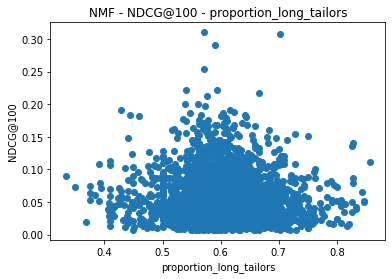

In [15]:
algo = "NMF"
metric = "NDCG@100"
feature = "proportion_long_tailors"

df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                        sep='\s*,\s*', index_col=0, engine='python')
df = df_features.join(df_models)

x_, y_ = get_x_y_from_pandas(df, [feature], algo)
x, y = [], []
for i in range(len(x_)):
    if y_[i] != 0:
        x.append(x_[i][0])
        y.append(y_[i])

plt_chart(x, y, f"{algo} - {metric} - {feature}", feature, metric)
get_corr(x, y)

Pearson:
	corr: 0.017
	p-value: 0.017

Spearman:
	corr: 0.012
	p-value: 0.477

Kendall:
	corr: 0.007
	p-value: 0.489



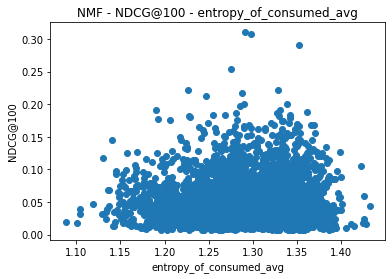

In [19]:
algo = "NMF"
metric = "NDCG@100"
feature = "entropy_of_consumed_avg"

df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                        sep='\s*,\s*', index_col=0, engine='python')
df = df_features.join(df_models)

x_, y_ = get_x_y_from_pandas(df, [feature], algo)
x, y = [], []
for i in range(len(x_)):
    if y_[i] != 0:
        x.append(x_[i][0])
        y.append(y_[i])

plt_chart(x, y, f"{algo} - {metric} - {feature}", feature, metric)
get_corr(x, y)

Pearson:
	corr: -0.025
	p-value: -0.025

Spearman:
	corr: -0.027
	p-value: 0.091

Kendall:
	corr: -0.018
	p-value: 0.091



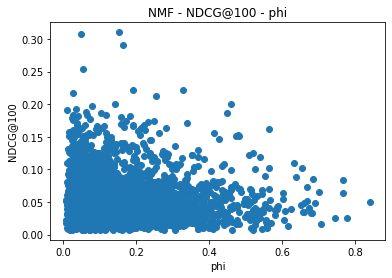

In [21]:
algo = "NMF"
metric = "NDCG@100"
feature = "phi"

# phi_i = non_zero da coluna / num users.

df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                        sep='\s*,\s*', index_col=0, engine='python')
df = df_features.join(df_models)

x_, y_ = get_x_y_from_pandas(df, [feature], algo)
x, y = [], []
for i in range(len(x_)):
    if y_[i] != 0:
        x.append(x_[i][0])
        y.append(y_[i])

plt_chart(x, y, f"{algo} - {metric} - {feature}", feature, metric)
get_corr(x, y)

Pearson:
	corr: -0.003
	p-value: -0.003

Spearman:
	corr: 0.01
	p-value: 0.521

Kendall:
	corr: 0.007
	p-value: 0.513



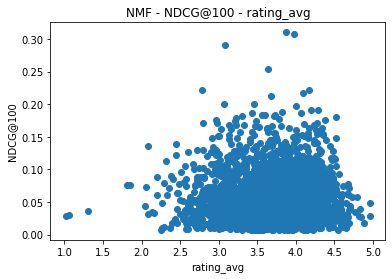

In [20]:
algo = "NMF"
metric = "NDCG@100"
feature = "rating_avg"

df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                        sep='\s*,\s*', index_col=0, engine='python')
df = df_features.join(df_models)

x_, y_ = get_x_y_from_pandas(df, [feature], algo)
x, y = [], []
for i in range(len(x_)):
    if y_[i] != 0:
        x.append(x_[i][0])
        y.append(y_[i])

plt_chart(x, y, f"{algo} - {metric} - {feature}", feature, metric)
get_corr(x, y)

Pearson:
	corr: 0.015
	p-value: 0.015

Spearman:
	corr: 0.003
	p-value: 0.874

Kendall:
	corr: 0.002
	p-value: 0.885



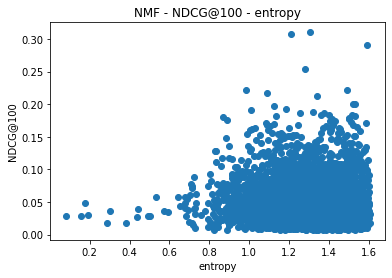

In [22]:
algo = "NMF"
metric = "NDCG@100"
feature = "entropy"

df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                        sep='\s*,\s*', index_col=0, engine='python')
df = df_features.join(df_models)

x_, y_ = get_x_y_from_pandas(df, [feature], algo)
x, y = [], []
for i in range(len(x_)):
    if y_[i] != 0:
        x.append(x_[i][0])
        y.append(y_[i])

plt_chart(x, y, f"{algo} - {metric} - {feature}", feature, metric)
get_corr(x, y)

# Estudo de casos extremos

+ Dividir entre grupos em que o NDCG é mais alto e mais baixo, e analisar se a árvore de decisão consegue diferenciar entre eles.

In [2]:
FEATURES = ["gini", "variation", "num_ratings", "rating_avg",
           "rating_std", "phi", "avg_phi", "entropy", "entropy_of_consumed_sum",
           "entropy_of_consumed_avg", "proportion_long_tailors"]
FEATURES_C = [("gini", [0.2, 0.5, 0.7]), ("variation", [0.2, 0.4, 0.55]), ("num_ratings", [0.1, 0.25]),
            ("rating_avg", [0.4, 0.6, 0.8]), ("rating_std", [0.4, 0.6]), ("phi", [0.15, 0.3, 0.6]),
            ("avg_phi", [0.3, 0.6]), ("entropy", [0.4, 0.7]), ("entropy_of_consumed_sum", [0.1, 0.3]),
            ("entropy_of_consumed_avg", [0.5, 0.7]), ("proportion_long_tailors", [0.3, 0.6, 0.8])]

metric = "NDCG@100"

algos = ['BPR', 'PMF', 'MF']
algos_cuts = [('BPR', [0.1, 0.2]), ('PMF', [0.06, 0.15]), ('MF', [0.05, 0.11])]

def get_new_x_y_from_pandas(df, features_str, features_in_buckets, algo):
    X, Y = [], []
    xs = [[] for _ in range(len(features_str))]
    
    for i, f in enumerate(features_str):
        xs[i] = df[[f]].to_numpy().flatten()
    ys = df[[algo]].to_numpy().flatten()
    
    for i in range(len(xs[0])):
        X.append([x[i] for x in xs] + [b[i] for b in features_in_buckets])
        Y.append(ys[i])
    return np.array(X), np.array(Y)

def divide_into_groups(arr, cuts=[0.1, 0.25]):
    res = []
    y_buckets = [[] for _ in range(len(cuts)+1)]
    for y in arr:
        idx = len(cuts)
        for i, c in enumerate(cuts):
            if(y <= c):
                idx = min(i, idx)
                break
        res.append(idx)
        y_buckets[idx].append(c)
    return res, y_buckets

def divide_Y_into_groups(Y, cuts=[0.1, 0.25]):
    res = []
    y_buckets = [[] for _ in range(len(cuts)+1)]
    for y in Y:
        idx = len(cuts)
        for i, c in enumerate(cuts):
            if(y <= c):
                idx = min(i, idx)
                break
        res.append(idx)
        y_buckets[idx].append(c)
    return res, y_buckets

def divide_into_extreme_groups(df, algo="BPR", extreme_amount=0.01):
    sorted_df = df.sort_values(by=[algo])
    sizes = int(len(sorted_df)*extreme_amount)
    head = sorted_df.head(sizes)
    tail = sorted_df.tail(sizes)
    
#     print(head)
#     print(tail)
    
    X_tail, X_head, Y_tail, Y_head = [], [], ['bad' for _ in range(sizes)], ['good' for _ in range(sizes)]
    
    for i in range(sizes):
        x_head = [f for f in head.iloc[i][FEATURES]]
        x_tail = [f for f in tail.iloc[i][FEATURES]]
        X_head.append(x_head)
        X_tail.append(x_tail)
    
    return (X_tail+X_head, Y_tail+Y_head)
    

In [3]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, f1_score

# FEATURES = ["gini", "variation", "num_ratings", "rating_avg",
#            "rating_std", "phi", "avg_phi", "entropy", "entropy_of_consumed_sum",
#            "entropy_of_consumed_avg", "proportion_long_tailors"]
# FEATURES_C = [("gini", [0.2, 0.5, 0.7]), ("variation", [0.2, 0.4, 0.55]), ("num_ratings", [0.1, 0.25]),
#             ("rating_avg", [0.4, 0.6, 0.8]), ("rating_std", [0.4, 0.6]), ("phi", [0.15, 0.3, 0.6]),
#             ("avg_phi", [0.3, 0.6]), ("entropy", [0.4, 0.7]), ("entropy_of_consumed_sum", [0.1, 0.3]),
#             ("entropy_of_consumed_avg", [0.5, 0.7]), ("proportion_long_tailors", [0.3, 0.6, 0.8])]
# algos_cuts = [('BPR', [0.1, 0.2]), ('PMF', [0.06, 0.15]), ('MF', [0.05, 0.11])]


metrics = ["NDCG@100", "AUC", "RMSE"]
algos = ['BPR', 'PMF', 'MF']
DS = 'ml-1M'
ammount = 0.05

df_norm_features = pd.read_csv(f"../datasets/{DS}/normalized_user_metrics.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                          sep='\s*,\s*', index_col=0, engine='python')

for algo in algos:
    for metric in metrics:
        df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                                sep='\s*,\s*', index_col=0, engine='python')
        df = df_norm_features.join(df_models)

        X, y = divide_into_extreme_groups(df, algo=algo, extreme_amount=ammount)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)  
        forest = svm.SVC()
        forest.fit(X_train, y_train)
        mean_acc = forest.score(X_test, y_test)
        y_pred = forest.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')

        # print metrics
        print(f'{metric}@{algo} -> getting top/botton: {ammount*100}%')
        print(f'{metric}@{algo} -> forest_mean_acc: {round(mean_acc, 3)}')
        print(f'{metric}@{algo} -> f1_score: {round(f1, 3)}')
        print(f'{metric}@{algo} -> confusion matrix [actual (linhas) vs predicted (colunas)]:')
        print(cm)
        print()

NDCG@100@BPR -> getting top/botton: 5.0%
NDCG@100@BPR -> forest_mean_acc: 0.493
NDCG@100@BPR -> f1_score: 0.49
NDCG@100@BPR -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[62 90]
 [63 87]]

AUC@BPR -> getting top/botton: 5.0%
AUC@BPR -> forest_mean_acc: 0.483
AUC@BPR -> f1_score: 0.414
AUC@BPR -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[ 21 131]
 [ 25 125]]

RMSE@BPR -> getting top/botton: 5.0%
RMSE@BPR -> forest_mean_acc: 0.474
RMSE@BPR -> f1_score: 0.47
RMSE@BPR -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[84 68]
 [91 59]]

NDCG@100@PMF -> getting top/botton: 5.0%
NDCG@100@PMF -> forest_mean_acc: 0.53
NDCG@100@PMF -> f1_score: 0.479
NDCG@100@PMF -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[ 33 119]
 [ 23 127]]

AUC@PMF -> getting top/botton: 5.0%
AUC@PMF -> forest_mean_acc: 0.51
AUC@PMF -> f1_score: 0.509
AUC@PMF -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[72 80]
 [68 82]]

RMSE@PMF -> getti

# Tentativa de rodar com novas features

+ The log of the number of distinct ratings dates
+ The log of the number of user ratings
+ The standard deviation of the user ratings
+ Regularized mean support for the user items
+ User support: number of ratings
+ Abnormality
+ AbnormalityCR
+ User average rating value
+ User standard deviation of rating values
+ Average number of ratings for the user items
+ Average of ratings from items rated by the user
+ Item support: number of ratings
+ Average rating value of item
+ Item standard deviation of rating values